In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def one_hot_encoding_plus(df):
    one_hot_berlin = pd.get_dummies(df['Venue Category'])
    one_hot_berlin['Neighbourhood']=df['Neighbourhood']
    one_hot_berlin_count=one_hot_berlin.groupby('Neighbourhood').sum()
    return one_hot_berlin_count
    
    
def best_cluster_num(df):
    from sklearn.cluster import KMeans
    var=np.inf
    iner=[]
    for k in range(2,len(df.index)):
        model=KMeans(n_clusters=k,random_state=42,verbose=False,n_init='auto')
        model.fit(df)
        iner.append(model.inertia_)
        if model.inertia_ < var:
            var=model.inertia_
    return var ,iner



def cluster_df(k,df):
    from sklearn.cluster import KMeans
    model=KMeans(n_clusters=k,random_state=42,verbose=False,n_init='auto')
    model.fit(df)
    return model.labels_


def plot_best_k(df,var , inertia):
    plt.plot(np.arange(2,len(df.index)),inertia,marker='o', linestyle='--')
    plt.axvline(x=var, color='red', linestyle='--', label='Vertical Line at x=3')
    plt.show()

    

def most_common_venue(df):
    df=df.drop('cluster',axis=1)
    dic={}
    col = [f'{i+1}th Most Common Venue' for i in range(len(df.columns))]
    for n in df.index:
        idx=df.loc[n].sort_values(ascending=False).index
        dic[n]=idx
    return pd.DataFrame(dic,index=col).T
    

In [29]:
df_berlin_venues = pd.read_csv('../data/df_berlin_venues.csv')

In [30]:
one_hot_berlin_count=one_hot_encoding_plus(df_berlin_venues)
one_hot_berlin_count

,Adult Store,African Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts and Entertainment,Asian Restaurant,Austrian Restaurant,BBQ Joint,Bakery,...,Tram Station,Trattoria,Turkish Restaurant,Vegan and Vegetarian Restaurant,Vietnamese Restaurant,Vintage and Thrift Store,Waterfront,Wine Bar,Wine Store,Women's Store
Neighbourhood,,,,,,,,,,,,,,,,,,,,,
Charlottenburg-Wilmersdorf,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Friedrichshain-Kreuzberg,0,0,0,1,0,1,0,1,1,3,...,0,1,0,3,2,0,2,1,1,0
Lichtenberg,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
Marzahn-Hellersdorf,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mitte,1,0,0,5,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
Neukölln,0,2,0,2,0,0,0,0,0,2,...,0,0,2,2,1,1,1,1,2,0
Pankow,0,0,0,0,0,0,1,0,0,1,...,3,0,0,0,0,0,0,0,0,0
Reinickendorf,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Spandau,0,0,1,0,0,0,0,0,0,2,...,0,2,0,0,2,0,0,0,0,0


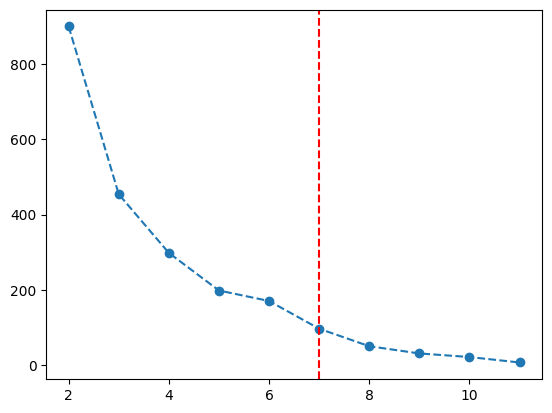

In [31]:
var , iner = best_cluster_num(one_hot_berlin_count)
plot_best_k(one_hot_berlin_count,var,iner)

In [34]:
one_hot_berlin_count['cluster']=cluster_df(7,one_hot_berlin_count)

In [35]:
most_common_venue(one_hot_berlin_count)

,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,...,151th Most Common Venue,152th Most Common Venue,153th Most Common Venue,154th Most Common Venue,155th Most Common Venue,156th Most Common Venue,157th Most Common Venue,158th Most Common Venue,159th Most Common Venue,160th Most Common Venue
Charlottenburg-Wilmersdorf,Italian Restaurant,Pizzeria,Café,Fuel Station,German Restaurant,Bus Stop,Plaza,Hotel,Fried Chicken Joint,Burger Joint,...,Fast Food Restaurant,Farmers Market,Eyecare Store,Exhibit,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop,Doner Restaurant,Women's Store
Friedrichshain-Kreuzberg,Café,Hotel,Ice Cream Parlor,Bar,Coffee Shop,Night Club,Bakery,Vegan and Vegetarian Restaurant,Hostel,Vietnamese Restaurant,...,Hardware Store,Greek Restaurant,Gay Bar,Gastropub,Garden,Furniture and Home Store,Fuel Station,Fountain,Food and Beverage Retail,Women's Store
Lichtenberg,Tram Station,Fuel Station,Furniture and Home Store,Café,Motorcycle Dealership,Hotel,Hot Dog Joint,Car Wash and Detail,Big Box Store,Hardware Store,...,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Exhibit,Eyecare Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food Court,Women's Store
Marzahn-Hellersdorf,Supermarket,Drugstore,Metro Station,Bus Stop,German Restaurant,Doner Restaurant,Pet Supplies Store,Lake,Shopping Mall,Bowling Alley,...,Electronics Store,Exhibit,Eyecare Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food Court,Food and Beverage Retail,Fountain,Women's Store
Mitte,Hotel,History Museum,Art Gallery,German Restaurant,Monument,Coffee Shop,Café,Church,Museum,Plaza,...,Karaoke Bar,Jazz and Blues Venue,Japanese Restaurant,Italian Restaurant,Caucasian Restaurant,Cheese Store,Chinese Restaurant,Indian Restaurant,African Restaurant,Motorcycle Dealership
Neukölln,Bar,Café,Coffee Shop,Cocktail Bar,Italian Restaurant,Indie Movie Theater,German Restaurant,Bistro,African Restaurant,Pub,...,Fried Chicken Joint,Fountain,Food Court,Farmers Market,Eyecare Store,Exhibit,Electronics Store,Eastern European Restaurant,Drugstore,Women's Store
Pankow,Tram Station,Fuel Station,Supermarket,Lake,Furniture and Home Store,Bus Stop,Bakery,Light Rail Station,Kebab Restaurant,Asian Restaurant,...,Eastern European Restaurant,Electronics Store,Exhibit,Eyecare Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food Court,Food and Beverage Retail,Women's Store
Reinickendorf,Sports Bar,Hostel,Fuel Station,Gastropub,Liquor Store,Bakery,Playground,Italian Restaurant,Ice Cream Parlor,Karaoke Bar,...,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Exhibit,Eyecare Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Women's Store
Spandau,Clothing Store,Italian Restaurant,Fast Food Restaurant,Park,Drugstore,Mobile Phone Store,Restaurant,Trattoria,Bus Stop,Hotel,...,Fried Chicken Joint,French Restaurant,Fountain,Food and Beverage Retail,Food Court,Falafel Restaurant,Eyecare Store,Exhibit,Eastern European Restaurant,Women's Store
Steglitz-Zehlendorf,Italian Restaurant,Fuel Station,Bus Stop,Pub,Café,Plaza,Steakhouse,History Museum,Bar,Park,...,Electronics Store,Exhibit,Eyecare Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Food Court,Food and Beverage Retail,Fountain,Women's Store
